# Git source:

https://github.com/AGM54/labintelig

# Task 1
Preguntas teóricas:

1. Explique con sus propias palabras, qué son los grafos computaciones y cuál es su
importancia para el cálculo de gradientes en aplicaciones como backpropagation.

1.1 Definición: Un grafo computacional es una representación matemática de un flujo de datos
en un programa. Es como un diagrama de flujo, pero con nodos que representan operaciones
matemáticas y aristas que representan el flujo de datos entre esas operaciones.

1.2 Importancia para el cálculo de gradientes: Los grafos computacionales son cruciales para el
cálculo de gradientes en backpropagation, un algoritmo clave para entrenar redes neuronales.
Backpropagation usa el grafo para calcular la derivada parcial de la función de pérdida con
respecto a cada parámetro de la red. Esta información se utiliza luego para actualizar los
parámetros y mejorar el rendimiento de la red.

2. Detalle cuales son los componentes y pasos que conforman una red neuronal. Con esto
en mente, ¿cómo mejoraría el perceptrón que hizo en el laboratorio pasado?

2.1 Componentes:
- Capa de entrada: Recibe los datos de entrada.
- Capas ocultas: Realizan el procesamiento de los datos.
- Capa de salida: Produce la predicción final.
- Cada capa está compuesta por neuronas artificiales, que son unidades básicas de
- procesamiento que realizan operaciones matemáticas simples.

2.2 Pasos:
- Propagación hacia adelante: Los datos se introducen en la capa de entrada y fluyen hacia
adelante a través de las capas ocultas hasta llegar a la capa de salida.
- Cálculo del error: Se calcula la diferencia entre la predicción de la red y el valor real.
- Propagación hacia atrás: Se utiliza backpropagation para calcular el gradiente de la función de
pérdida con respecto a cada parámetro de la red.
- Actualización de parámetros: Se actualizan los parámetros de la red en la dirección del
gradiente negativo, con el objetivo de minimizar la función de pérdida.
- Mejora del perceptrón:
-- Agregar capas ocultas: Permite a la red aprender relaciones más complejas entre las variables
de entrada y salida.
- Utilizar funciones de activación no lineales: Permite a la red modelar relaciones no lineales
entre las variables.
- Regularización: Ayuda a prevenir el sobreajuste y mejorar la generalización de la red.

3. Investigue y explique cómo se selecciona el valor K usando el método de la silueta para
el algoritmo de K-Means. Explique las fórmulas (ecuaciones) que lo componen así como
las asumpciones, si hay.

3.1 Descripción del método:
El método de la silueta evalúa la calidad de los clusters creados por K-Means asignando un
valor de silueta a cada punto de datos. El valor de la silueta se calcula como la diferencia entre
la distancia promedio del punto a los puntos de su propio cluster y la distancia promedio del
punto a los puntos del cluster más cercano.

3.2 Fórmulas:
- Valor de la silueta para un punto i:
-- s_i = (b_i - a_i) / max(a_i, b_i)
- Distancia promedio del punto i a los puntos de su propio cluster:
-- a_i = \frac{1}{n_c} \sum_{j \in C_i} d(i, j)
- Distancia promedio del punto i a los puntos del cluster más cercano:
-- b_i = \min_{c \neq C_i} \frac{1}{n_c} \sum_{j \in C_c} d(i, j)

3.3 Asumpciones:
- Los datos son numéricos.
- Los clusters son de forma similar.

3.4 Selección de K:
Se elige el valor de K que maximiza el valor promedio de la silueta para todos los puntos de
datos.

4. Investigue sobre Principal Component Analysis (PCA) y responda respecto a algoritmos
como K-Means:
a. a. ¿Cómo podría ayudarle a mejorar la calidad de sus clusters cuando se usa
K-Means?

4.1 Mejora de la calidad de los clusters:
PCA puede ayudar a mejorar la calidad de los clusters creados por K-Means al:
Reducir la dimensionalidad de los datos: Esto puede facilitar la identificación de clusters en un
espacio de menor dimensionalidad.
Eliminar características irrelevantes: Esto puede mejorar la precisión de K-Means al enfocarse
en las características más importantes.

4.2 Pasos para usar PCA con K-Means:
Aplicar PCA a los datos para obtener un conjunto de componentes principales.
Seleccionar un número adecuado de componentes principales.
Usar los componentes principales como entrada a K-Means.

# Task 2
## preguntas

### 2.1

Cuál implementación fue mejor? ¿Por qué? 

La implementación de librer+ias fue mejor, puesto que es más eficiente al momneto de realizara el fit y elbow. 

# Task 2.1 
Kmeans con librerías

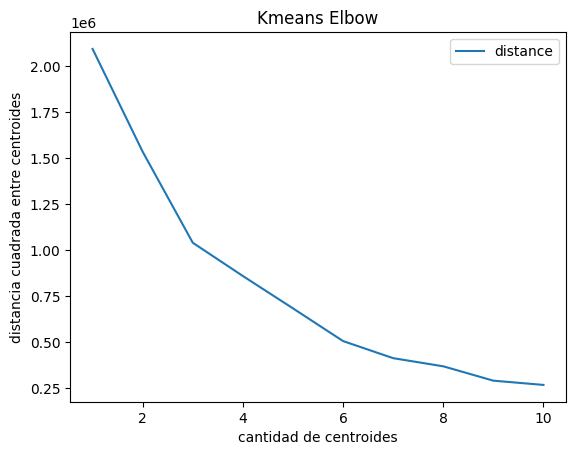

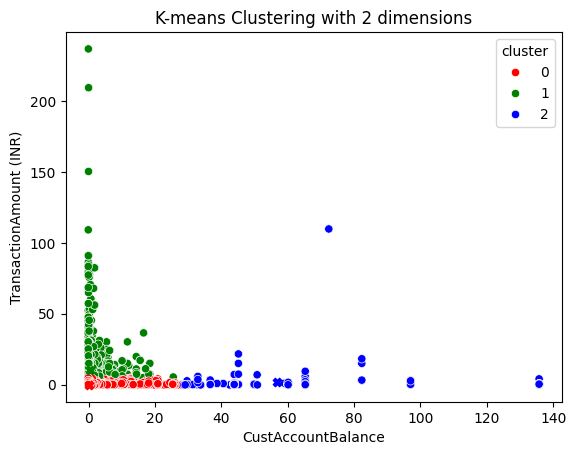

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import seaborn as sns
#cargar el dataset
data = pd.read_csv("bank_transactions.csv")

#Processado de la data:

data = data[['CustAccountBalance', 'TransactionAmount (INR)']]

#escalar la data numérica para que no haya desbalacnes en el peso de cada uno, hacer que w(Account) ~ w(INR)
for numeric in ['CustAccountBalance', 'TransactionAmount (INR)']:
    mean = data[numeric].mean()
    sd = data[numeric].std()
    data[numeric] = data[numeric].apply(lambda x: (x-mean)/sd)

#eliminar todos los nan
# Imputación de valores faltantes (NaN)
imputer = SimpleImputer(strategy='mean')
data[['CustAccountBalance', 'TransactionAmount (INR)']] = imputer.fit_transform(data[['CustAccountBalance', 'TransactionAmount (INR)']])

#implementar k means

#elbow method
distances_df = []
for clusters in range(1,11):
    km = KMeans(n_clusters=clusters)
    km.fit(data)
    distances_df.append([clusters,km.inertia_])
distances_df = pd.DataFrame(distances_df,columns=["clusters","distance"])

#graficar
distances_df.set_index("clusters").plot()
plt.xlabel("cantidad de centroides")
plt.ylabel("distancia cuadrada entre centroides")
plt.title("Kmeans Elbow")
plt.show()

# se usa 3 después de revisar la gráfica del elbow
km = KMeans(n_clusters=3)
data["cluster"] = km.fit_predict(data)
centroids = km.cluster_centers_


custom_palette = ["red", "green", "blue"]
sns.scatterplot(x="CustAccountBalance", y="TransactionAmount (INR)", hue=data['cluster'], data=data,palette=custom_palette)
plt.scatter(x=centroids[0][0],y=centroids[0][1], color="red" , marker="X")
plt.scatter(x=centroids[1][0],y=centroids[1][1], color="green",  marker="X")
plt.scatter(x=centroids[2][0],y=centroids[2][1], color="blue",  marker="X")
plt.title('K-means Clustering with 2 dimensions')
plt.show()

# Task 2.1.1
K means sin librerías

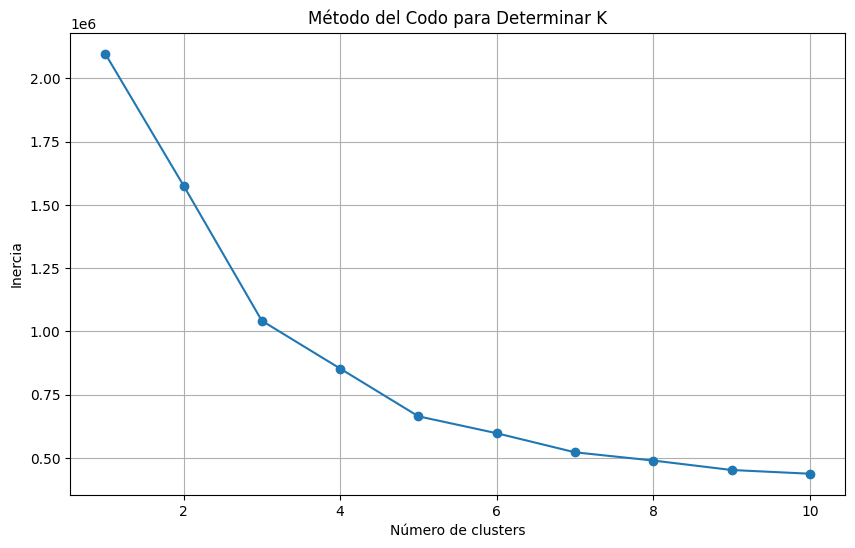

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score


data = pd.read_csv("./bank_transactions.csv")

# Encoding de variables categóricas
categorical_vars = ['CustGender', 'CustLocation']
encoder = LabelEncoder()
for var in categorical_vars:
    data[var] = encoder.fit_transform(data[var])

# Escalado de variables numéricas
numerical_vars = ['CustAccountBalance', 'TransactionAmount (INR)']
scaler = StandardScaler()

# Imputación de valores faltantes 
imputer = SimpleImputer(strategy='mean')
data[numerical_vars] = imputer.fit_transform(data[numerical_vars])

# Escalado de datos después de la imputación
data[numerical_vars] = scaler.fit_transform(data[numerical_vars])

# Implementación del algoritmo K-Means
def k_means(X, n_clusters, max_iterations=100, tolerance=1e-4):
    np.random.seed(42)  # Para reproducibilidad
    centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]

    for _ in range(max_iterations):
        # Paso 2: Asignar cada punto al centroide más cercano
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)

        new_centroids = np.array([X[labels == i].mean(axis=0) if X[labels == i].size > 0 else centroids[i] for i in range(n_clusters)])

        # Convergencia: si los centroides no cambian significativamente, detener el algoritmo
        if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < tolerance):
            break
        
        centroids = new_centroids
    
    return labels, centroids

# Implementación del método del codo para determinar el número óptimo de clusters
def calculate_inertia(X, centroids, labels):
    inertia = 0
    for i, center in enumerate(centroids):
        inertia += np.sum((X[labels == i] - center) ** 2)
    return inertia

# Selecciona las características numéricas escaladas para aplicar K-Means
X = data[numerical_vars].values

# Aplicar PCA para reducir a 2 componentes para la visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Rango de valores de k para probar
k_values = range(1, 11)
inertias = []

# Calcular la inercia para cada valor de k
for k in k_values:
    labels, centroids = k_means(X_pca, k)
    inertia = calculate_inertia(X_pca, centroids, labels)
    inertias.append(inertia)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, marker='o')
plt.title('Método del Codo para Determinar K')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()


n_clusters_optimo = 4
labels, centroids = k_means(X_pca, n_clusters_optimo)

# Calcular el Silhouette Score para el número óptimo de clusters
score = silhouette_score(X_pca, labels)
print('Silhouette Score para n_clusters_optimo:', score)

# Visualización de los clusters en las componentes principales
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters_optimo):
    plt.scatter(X_pca[labels == cluster, 0], X_pca[labels == cluster, 1], label=f'Cluster {cluster}', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroides')
plt.title('Clusters en Componentes Principales')
plt.xlabel('PC1 (Componente Principal 1)')
plt.ylabel('PC2 (Componente Principal 2)')
plt.legend()
plt.show()


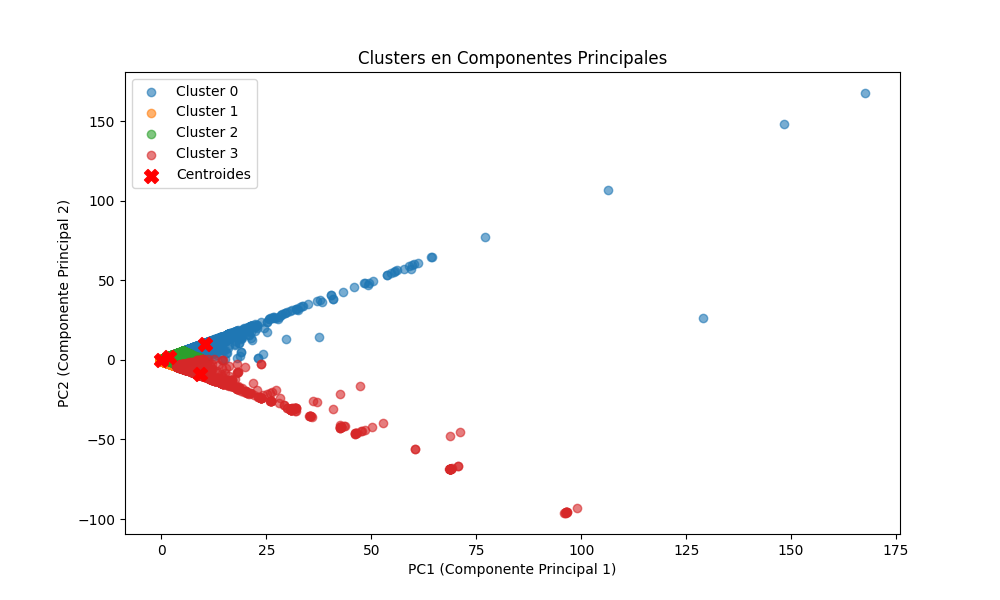

Procesamiento del dataset:
El dataset contenía variables categóricas como 'CustGender' y 'CustLocation'. Estas variables se convirtieron a valores numéricos utilizando la clase LabelEncoder de la librería Scikit-learn. Esto asignó un número entero único a cada categoría en las variables categóricas.

Las variables numéricas, como 'CustAccountBalance' y 'TransactionAmount', a menudo tenían escalas diferentes. Para asegurarse de que todas las características contribuyeran de manera equitativa al modelo, se escalarón a un rango común utilizando la clase StandardScaler de Scikit-learn. Esto transformó las características para que tuvieran una media de 0 y una desviación estándar de 1.

Se utilizó la clase SimpleImputer de Scikit-learn, que rellenó los valores faltantes con la media de las columnas correspondientes.


Para aplicar K-Means, se seleccionaron las características numéricas escaladas ('CustAccountBalance' y 'TransactionAmount') como variables de entrada. 


Las características escogidas son 'CustAccountBalance' y 'TransactionAmount'. Estas son las dos variables que se utilizaron para la visualización de los clusters.


La métrica de Silhouette se utilizó porque proporciona una medida de cuán bien separados están los clusters. Esta métrica calcula el grado de separación entre los clusters y cuán similares son los puntos dentro de cada cluster. Un valor de Silhouette cercano a +1 indica que los puntos están bien agrupados, mientras que un valor cercano a -1 indica que los puntos podrían estar mejor agrupados en clusters diferentes.

La gráfica en particular,muestra que el  punto de codo se observa en el número de clústeres igual a 4, ya que es el punto donde la caída en la inercia comienza a disminuir. Esto sugeriría que el número óptimo de clústeres para los datos que se están analizando sería 4. Después de este punto, las mejoras en la reducción de la inercia se vuelven marginales a medida que se aumenta el número de clústeres.

# Task 2.2

Mixture models con librerías

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

# Carga del conjunto de datos
with open('bank_transactions.csv', 'rb') as f:
    df = pd.read_csv(f, encoding='utf-8')



# Selecci�n de variables
variables = ['CustAccountBalance', 'TransactionAmount (INR)']

# Escalado de variables numericas
scaler = StandardScaler()
df[variables] = scaler.fit_transform(df[variables])

# An�lisis de Componentes Principales (PCA)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df[variables])

# Implementacion de modelos de mezcla con diferentes n�meros de clusters
modelos = {}
for n_clusters in range(2, 6):
  modelos[n_clusters] = GaussianMixture(n_components=n_clusters)
  modelos[n_clusters].fit(pca_components)

# Evaluacion de la calidad de los clusters
silhouette_scores = {}
for n_clusters, model in modelos.items():
  silhouette_scores[n_clusters] = model.score_samples(pca_components)

# Seleccion del numero de clusters
mejor_n_clusters = 3

# Visualizacion de clusters
import matplotlib.pyplot as plt
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=modelos[mejor_n_clusters].predict(pca_components), s=50, alpha=0.7)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Interpretacion de clusters
for i in range(mejor_n_clusters):
  print(f"Cluster {i + 1}:")
  print(f"  - Saldo promedio: {df['CustAccountBalance'].iloc[modelos[mejor_n_clusters].predict(pca_components) == i].mean():.2f}")
  print(f"  - Monto promedio de transacci�n: {df['TransactionAmount (INR)'].iloc[modelos[mejor_n_clusters].predict(pca_components) == i].mean():.2f}")
  print(f"  - Frecuencia de transacciones: {df['TransactionFrequency'].iloc[modelos[mejor_n_clusters].predict(pca_components) == i].mean():.2f}")



TypeError: read_csv() got an unexpected keyword argument 'errors'

# Task 2.2.1

In [22]:
#se usa un gausian mixture models
#se tomó de referencia la implementación presenete en https://towardsdatascience.com/gaussian-mixture-models-implemented-from-scratch-1857e40ea566
import numpy as np
import pandas as pd

class GaussianMixture():
    def __init__(self,clusters,max_depth=100 ,tags = None ) :
        '''
        max_depth = max amount of iterations when fitting
        cluters = the amount of clusters to split the data
        Tags for namming the clusters
        '''
        self.max_depth = max_depth
        self.clusters = clusters 
        if tags : 
            self.cluster_tags = tags
        else:
            self.cluster_tags = [f"comp{index}" for index in range(self.clusters)]

        #calculate the fractions for each cluster 
        self.phi = [1/self.clusters for c in range(self.clusters)]

    def multivariate_normal(self, X, mean_vector, covariance_matrix):
        '''
        Implementation of the multivariate normal formula
        normal distribution for vectors
        '''
        return (2*np.pi)**(-len(X)/2)*np.linalg.det(covariance_matrix)**(-1/2)*np.exp(-np.dot(np.dot((X-mean_vector).T, np.linalg.inv(covariance_matrix)), (X-mean_vector))/2)
    def fit(self,X):
        '''
        X is the dataset used is a 2d np array
        formulas of Mstep used
        '''

        #divide the X initially based on the cluster amount stated
        #just for the initial state for fitting 
        new_X = np.array_split(X, self.clusters)
        # Initial computation of the mean-vector and covarience matrix
        self.mean_vector = [np.mean(x, axis=0) for x in new_X]
        self.covariance_matrixes = [np.cov(x.T) for x in new_X]
        del new_X
        for iteration in range(self.max_depth):
            self.r = np.zeros((len(X), self.clusters))
            # Calculating the r matrix
            for n in range(len(X)):
                for k in range(self.clusters):
                    self.r[n][k] = self.phi[k] * self.multivariate_normal(X[n], self.mean_vector[k], self.covariance_matrixes[k])
                    self.r[n][k] /= sum([self.phi[j]*self.multivariate_normal(X[n], self.mean_vector[j], self.covariance_matrixes[j]) for j in range(self.clusters)])
            # Calculating the N
            N = np.sum(self.r, axis=0)

            #initializaing the means
            self.mean_vector = np.zeros((self.clusters, len(X[0])))

            for k in range(self.clusters):
                for n in range(len(X)):
                    self.mean_vector[k] += self.r[n][k] * X[n]
            self.mean_vector = [1/N[k]*self.mean_vector[k] for k in range(self.clusters)]

            self.covariance_matrixes = [np.zeros((len(X[0]), len(X[0]))) for k in range(self.clusters)]
                # Updating the covariance matrices
            for k in range(self.clusters):
                self.covariance_matrixes[k] = np.cov(X.T, aweights=(self.r[:, k]), ddof=0)
            self.covariance_matrixes = [1/N[k]*self.covariance_matrixes[k] for k in range(self.clusters)]
            
            # uptade the fractions of each cluster based on the new found groups
            self.phi = [N[k]/len(X) for k in range(self.clusters)]

    def predict(self, X):
            '''
                The predicting function
                    :param X: 2-d array numpy array
                        The data on which we must predict the clusters
            '''
            probas = []
            for n in range(len(X)):
                probas.append([self.multivariate_normal(X[n], self.mean_vector[k], self.covariance_matrixes[k])
                            for k in range(self.clusters)])
            cluster = []
            for proba in probas:
                cluster.append(self.cluster_tags[proba.index(max(proba))])
            return cluster
    

In [24]:
# get the data adn fit the model
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import seaborn as sns

#Processado de la data:

data = data[['CustAccountBalance', 'TransactionAmount (INR)']]

#escalar la data numérica para que no haya desbalacnes en el peso de cada uno, hacer que w(Account) ~ w(INR)
for numeric in ['CustAccountBalance', 'TransactionAmount (INR)']:
    mean = data[numeric].mean()
    sd = data[numeric].std()
    data[numeric] = data[numeric].apply(lambda x: (x-mean)/sd)

#eliminar todos los nan
# Imputación de valores faltantes (NaN)
imputer = SimpleImputer(strategy='mean')
data[['CustAccountBalance', 'TransactionAmount (INR)']] = imputer.fit_transform(data[['CustAccountBalance', 'TransactionAmount (INR)']])

X = data.values[:int(0.5*len(data.values))]

GMM = GaussianMixture(3)

GMM.fit(X)


TypeError: slice indices must be integers or None or have an __index__ method

In [ ]:
clusters = GMM.predict(X)